# Matrix Structural Analysis Use Tutorial 2

## This tutorial outlines the use of the matrix structural analysis algorithm for the second problem during the code review on 2/24/25.

### Begin by importing necessary libraries and functionality from matrix structural analysis file

In [1]:
import sys
import os
import numpy as np

sys.path.append(os.path.abspath('..'))
from src.mat_struct import mat_struct
from src.nonlinear_analysis import *

### Define node coordinates as row vectors (x, y, z)

In [2]:
node0 = [0, 0, 0]
node1 = [-5, 1, 10]  
node2 = [-1, 5, 13] 
node3 = [-3, 7, 11]
node4 = [6, 9, 5]
nodes = np.array([node0, node1, node2, node3, node4])

### Define elements to establish connectivity in the structure ([node1, node2, E, v, A, Iz, Iy, Ip, J, z_axis])

In [3]:
el_1 = [0, 1, 500, 0.3, np.pi, np.pi/4, np.pi/4, np.pi/2, np.pi/2, None]
el_2 = [1, 2, 500, 0.3, np.pi, np.pi/4, np.pi/4, np.pi/2, np.pi/2, None]
el_3 = [2, 3, 500, 0.3, np.pi, np.pi/4, np.pi/4, np.pi/2, np.pi/2, None]
el_4 = [2, 4, 500, 0.3, np.pi, np.pi/4, np.pi/4, np.pi/2, np.pi/2, None]
element_connect = np.array([el_1, el_2, el_3, el_4], dtype=object)

### Define applied forces as node vectors corresponding to the node location (Fx, Fy, Fz, Mx, My, Mz)

In [4]:
f_appl = np.array([[0,0,0,0,0,0],   # Node 0: No force
                   [0.1,-0.05,-0.075,0,0,0], # Node 1: applied force
                   [0, 0, 0, 0.5,-0.1,0.3],   # Node 2: Applied moment
                   [0,0,0,0,0,0],  # Node 3: No force
                   [0,0,0,0,0,0]]) # Node 4: No Force

### Define support conditions, where a value of 1 is restricted and a value of 0 is unrestricted for the corresponding DOF (Node index, DOF 1, DOF 2, DOF 3, DOF 4, DOF 5, DOF 6)

In [5]:
support_0 = [0, 0, 0, 1, 0, 0, 0] 
support_1 = [1, 0, 0, 0, 0, 0, 0]
support_2 = [2, 0, 0, 0, 0, 0, 0]
support_3 = [3, 1, 1, 1, 1, 1, 1]
support_4 = [4, 1, 1, 1, 0, 0, 0]
supports = np.array([support_0, support_1, support_2, support_3, support_4])

### Run Matrix Structural Analysis Algorithm to output displacement vector and force vector, respectively

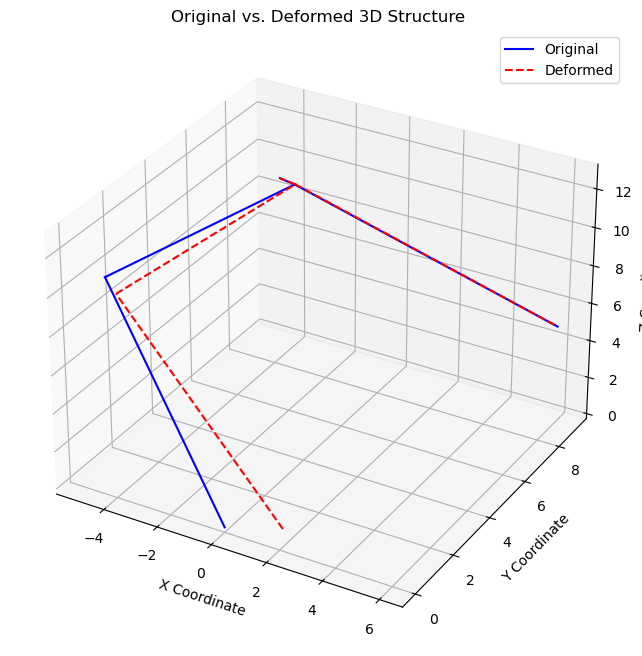

In [6]:
del_vec, F_vec = nonlinear_analysis(nodes, element_connect, f_appl, supports)

### Print Results

In [7]:
print("Displacements:\n", del_vec)
print("Forces:\n", F_vec)

Displacements:
 [ 0.16297422  0.06753731  0.          0.0038603  -0.00977672  0.00997704
  0.05683823 -0.02127261 -0.04423469  0.00395566 -0.00929992  0.00997704
  0.00104443  0.00109052  0.00034632  0.00313556 -0.0040055   0.00514273
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.00455166  0.00049019  0.00066426]
Forces:
 [-4.44089210e-16  1.66533454e-16  6.67219970e-03  0.00000000e+00
  2.22044605e-16 -8.32667268e-17  1.00000000e-01 -5.00000000e-02
 -7.50000000e-02 -2.22044605e-16  4.44089210e-16 -4.44089210e-16
 -1.33226763e-15 -1.33226763e-15 -1.77635684e-15  5.00000000e-01
 -1.00000000e-01  3.00000000e-01 -2.35127129e-02  1.37948249e-01
  2.53249828e-02 -4.11610746e-01  2.98118234e-01 -3.61440337e-01
 -7.64872871e-02 -8.79482485e-02  4.30028175e-02 -1.11022302e-16
 -6.24500451e-17 -2.77555756e-17]
